# Detecting AruCo patterns for AR applications

Understanding a camera's position in a surrounding 3D space is a very challenging and hard-to-solve task. Specifically designed patterns, named AruCo markers, are called up to solve this issue. Each marker has enough information to determine the camera position, and also contains information about itself; so it's possible to distinguish between different markers, and, through that, understand the scene. In this recipe, we will review how to create and detect AruCo markers with OpenCV.

As has been mentioned, AruCo markers have special designs and encode an identifier in black and white squares inside. So, to create the proper marker, it's necessary to follow the rules, and to also set parameters, such as the marker size and identifier. All of this can be done with the `cv2.aruco.drawMarker` function. It accepts a dictionary of the markers, an identifier of the marker, and image size. The dictionary determines the correspondence between the marker's appearance and the marker's ID, and returns the image with a drawn marker. OpenCV includes predefined dictionaries, which can be retrieved with the `cv2.aruco.getPredefinedDictionary` function (which takes the dictionary name as an argument). In the preceding code, `cv2.aruco.DICT_6X6_250` is used, and this dictionary's name means that the dictionary consists of $6\times6$ markers (the size of the inside grid of black and white squares), and includes identifiers from `0` to `249`.

To detect AruCo markers in the image, you need to use the `cv2.aruco.detectMarkers` routine. This function takes an input image and a dictionary from which it is necessary to find markers. The result of this function's work is a list with four corners for all of the found markers, a list of markers IDs (the order corresponds to the list of the corners), and list of rejected corners, which can be useful for debug purposes.

To easily and quickly draw the results of the detection, it's reasonable to use `cv2.aruco.drawDetectedMarkers`. It accepts an image to draw a list of detected corners and a list of identifiers on.



In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S04\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s04\env

d:\html_doc\program\opencv\packt\s04\env\lib\site-packages
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


------  img----------------------    Shape(700, 700) img: uint8
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 ]
[ 0 0 0 0 0 0 0 0 0 0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 ]
[ 0 0 0 0 0 0 0 0 0 0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 ]


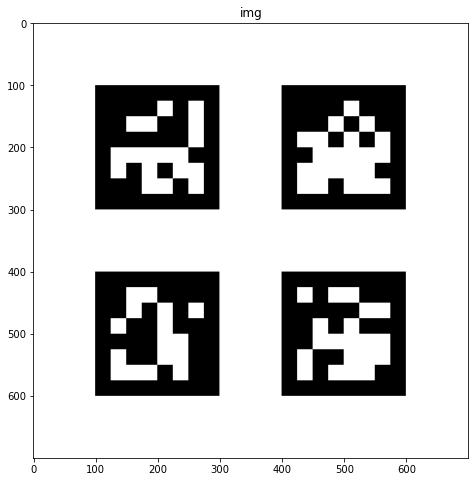

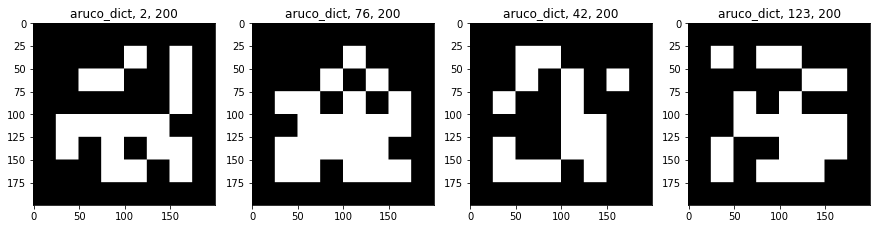

In [ ]:
import cv2.aruco as aruco

aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

img = np.full((700, 700), 255, np.uint8)

img[100:300, 100:300] = aruco.drawMarker(aruco_dict, 2, 200)
img[100:300, 400:600] = aruco.drawMarker(aruco_dict, 76, 200)
img[400:600, 100:300] = aruco.drawMarker(aruco_dict, 42, 200)
img[400:600, 400:600] = aruco.drawMarker(aruco_dict, 123, 200)



###########################################################
print_image('img','img',img,118,128,190,220)
plt_view_image(plt,[["img",img]],figsize=(8,8), axis='on', cmap='gray')
plt_view_image(plt,[["aruco_dict, 2, 200" ,aruco.drawMarker(aruco_dict, 2, 200)],
                    ["aruco_dict, 76, 200",aruco.drawMarker(aruco_dict, 76, 200)],
                    ["aruco_dict, 42, 200",aruco.drawMarker(aruco_dict, 42, 200)],
                    ["aruco_dict, 123, 200",aruco.drawMarker(aruco_dict, 123, 200)]],
               figsize=(15,8), axis='on', cmap='gray')

# Display digits image
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
image_GaussianBlur = cv2.GaussianBlur(img, (11, 11), 0)



###########################################################
print_image('img','img',img,118,128,190,220)
print_image('image_GaussianBlur','image_GaussianBlur',image_GaussianBlur,118,128,190,220)
plt_view_image(plt,[["img",img],
                    ["image GaussianBlur",image_GaussianBlur]
                   ],
               figsize=(15,8), axis='on', cmap='gray')

# Display digits image
cv2.imshow('Created AruCo markers, image_GaussianBlur', np.hstack([img, image_GaussianBlur]))
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

corners, ids, _ = aruco.detectMarkers(image_GaussianBlur, aruco_dict)

image_color = cv2.cvtColor(image_GaussianBlur, cv2.COLOR_GRAY2BGR)
aruco.drawDetectedMarkers(image_color, corners, ids)


###########################################################
print_image('img','img',img,96,110,96,110)
print_image('image_GaussianBlur','image_GaussianBlur',image_GaussianBlur,96,110,96,110)
print_image('image_color','image_color',image_color,99,113,99,106)
plt_view_image(plt,[["img",img],
                    ["image GaussianBlur",image_color],
                    ["image GaussianBlur",image_color[94:108,96:110,[2,1,0]]],
                    ["image drawDetectedMarkers",image_GaussianBlur]
                   ],
               figsize=(15,8), axis='on', cmap='gray')

# Display digits image
cv2.imshow('Detected AruCo markers', np.hstack([image_color]))
cv2.waitKey()
cv2.destroyAllWindows()